In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
df_data =pd.read_csv('1.04.+Real-life+example.csv')

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [6]:
df_data

Brand     Price       Body  Mileage  EngineV Engine Type Registration  Year              Model
0               BMW    4200.0      sedan      277      2.0      Petrol          yes  1991                320
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel          yes  1999       Sprinter 212
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas          yes  2003              S 500
3              Audi   23000.0  crossover      240      4.2      Petrol          yes  2007                 Q7
4            Toyota   18300.0  crossover      120      2.0      Petrol          yes  2011              Rav 4
...             ...       ...        ...      ...      ...         ...          ...   ...                ...
4340  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel          yes  2014              S 350
4341            BMW    6500.0      sedan        1      3.5      Petrol          yes  1999                535
4342            BMW    8000.0      sedan      194      2.0      Petrol          yes  1985                520
4343         Toyota   14200.0      sedan       31      NaN      Petrol          yes  2014            Corolla
4344     Volkswagen   13500.0        van      124      2.0      Diesel          yes  2013  T5 (Transporter) 

[4345 rows x 9 columns]

In [7]:
df_data.isna().values.any()

np.True_

In [8]:
df_data.duplicated().values.any()

np.True_

In [13]:
df_data.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [77]:
clean_data = df_data.copy()
clean_data = clean_data.dropna()

In [78]:
clean_data.isna().values.any()

np.False_

In [79]:
clean_data = clean_data.drop_duplicates()

In [80]:
clean_data.duplicated().values.any()

np.False_

In [81]:
clean_data.isnull().values.any()

np.False_

In [82]:
clean_data.nunique()

Brand             7
Price           892
Body              6
Mileage         407
EngineV          72
Engine Type       4
Registration      2
Year             39
Model           306
dtype: int64

In [51]:
clean_data.describe(include='all')

Brand          Price   Body      Mileage      EngineV Engine Type Registration         Year    Model
count         3975    3975.000000   3975  3975.000000  3975.000000        3975         3975  3975.000000     3975
unique           7            NaN      6          NaN          NaN           4            2          NaN      306
top     Volkswagen            NaN  sedan          NaN          NaN      Diesel          yes          NaN  E-Class
freq           871            NaN   1518          NaN          NaN        1832         3604          NaN      181
mean           NaN   19056.936091    NaN   164.820126     2.763643         NaN          NaN  2006.290063      NaN
std            NaN   24976.141632    NaN   103.117252     4.965189         NaN          NaN     6.683223      NaN
min            NaN     600.000000    NaN     0.000000     0.600000         NaN          NaN  1969.000000      NaN
25%            NaN    6950.000000    NaN    92.000000     1.800000         NaN          NaN  2002.000000      NaN
50%            NaN   11400.000000    NaN   159.000000     2.200000         NaN          NaN  2007.000000      NaN
75%            NaN   21317.500000    NaN   230.000000     3.000000         NaN          NaN  2011.000000      NaN
max            NaN  300000.000000    NaN   980.000000    99.990000         NaN          NaN  2016.000000      NaN

In [30]:
import itertools

In [28]:
col_names = clean_data.columns.tolist()

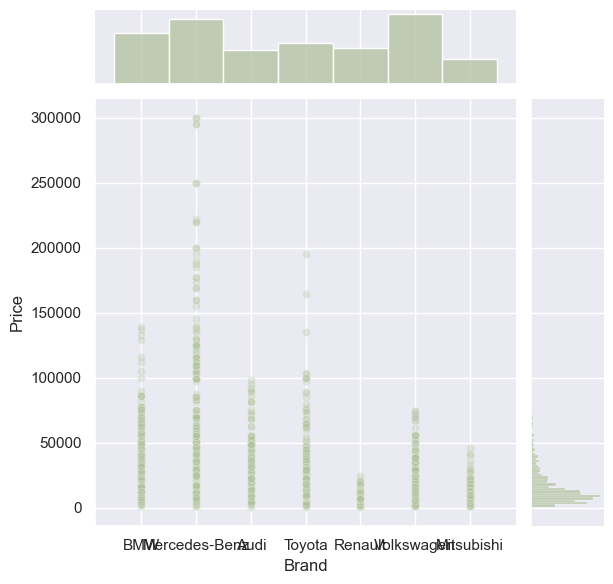

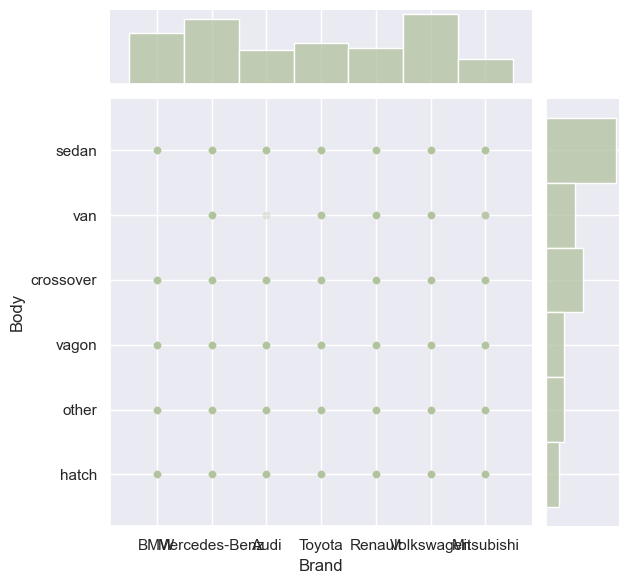

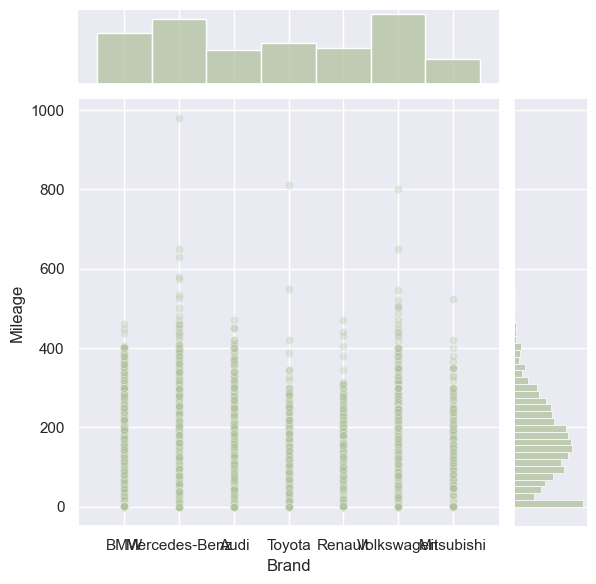

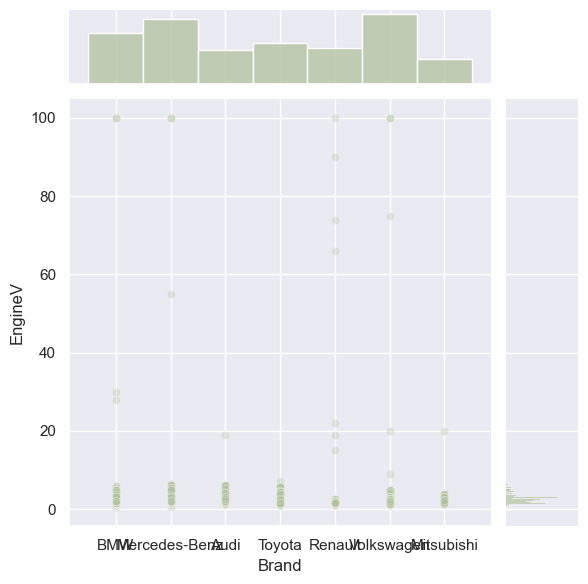

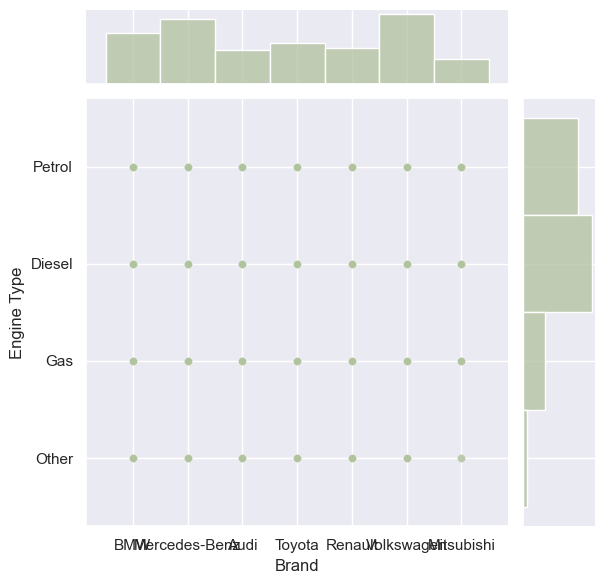

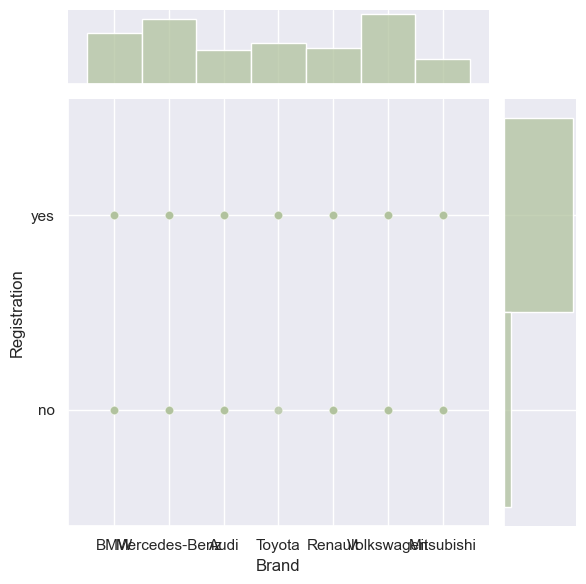

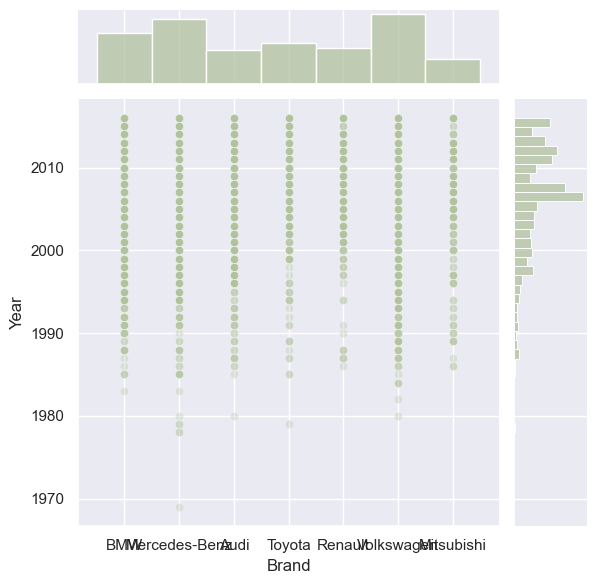

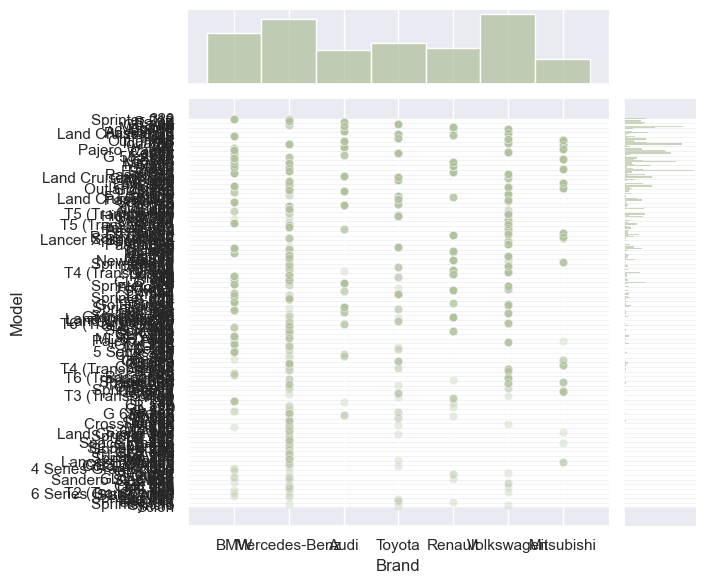

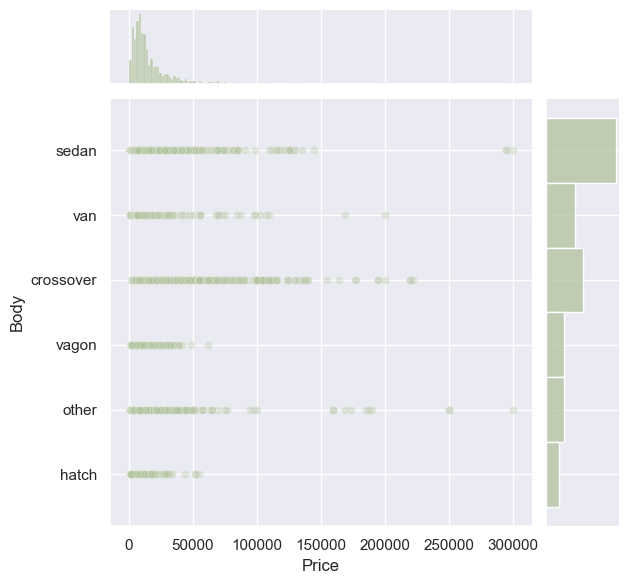

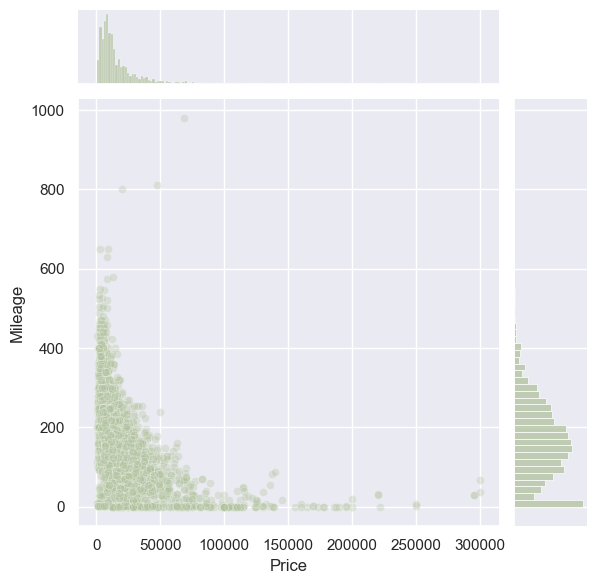

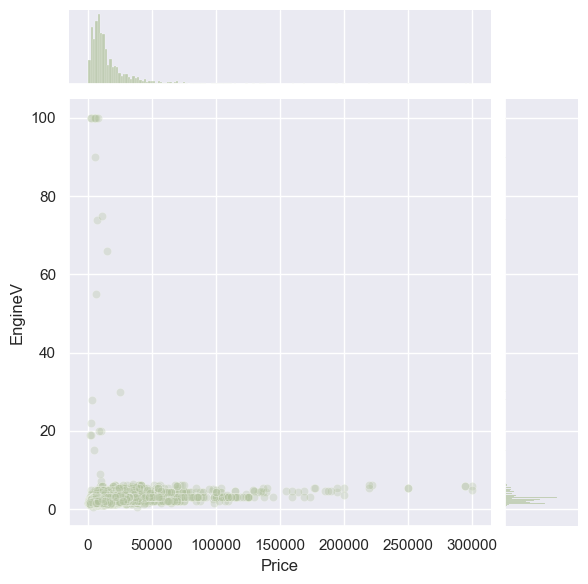

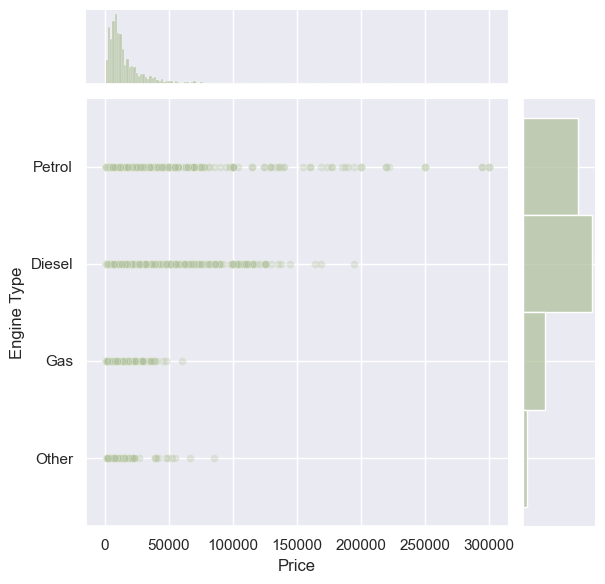

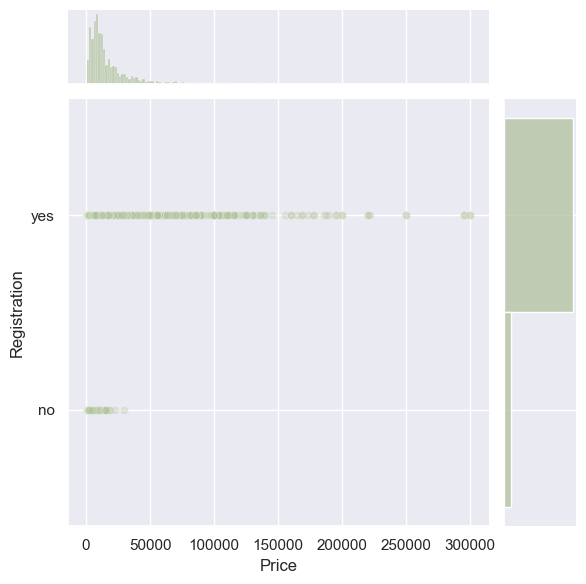

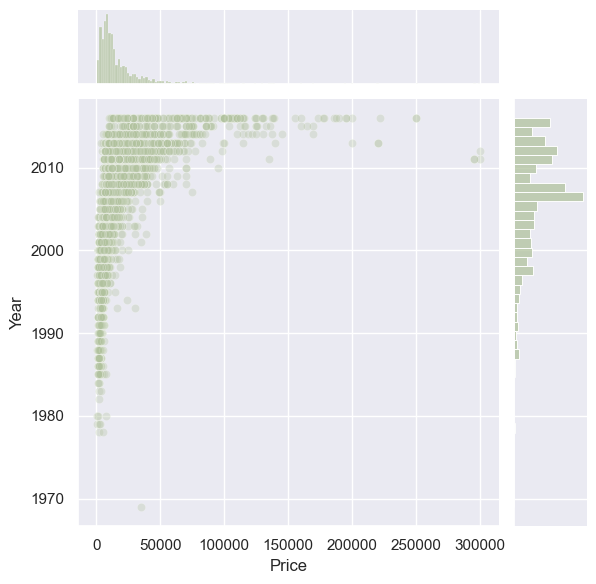

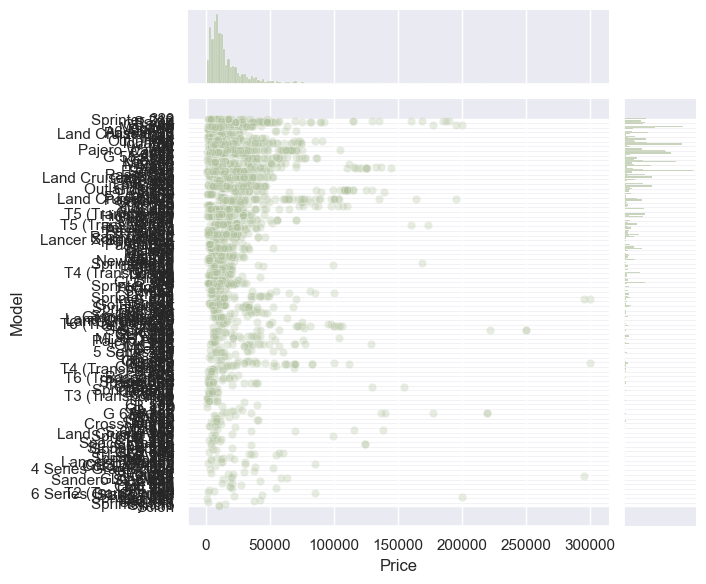

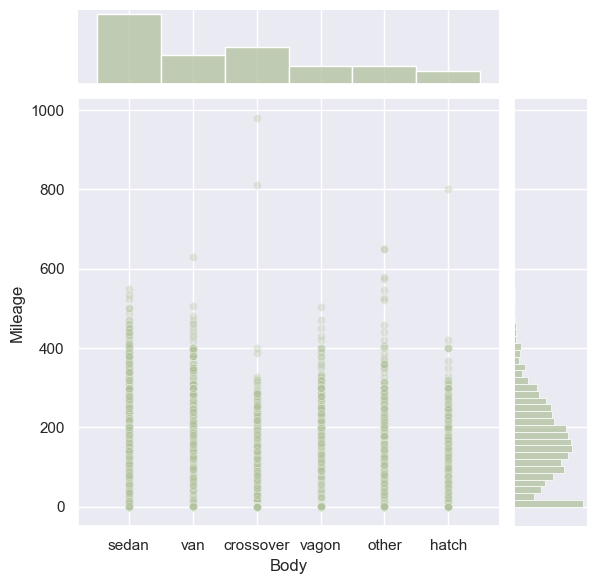

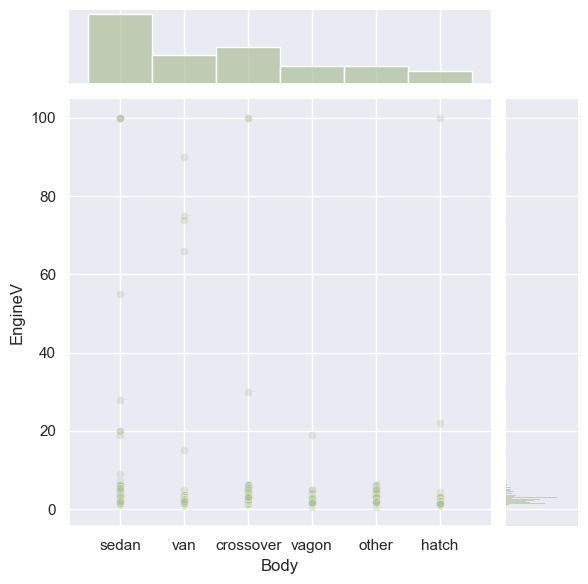

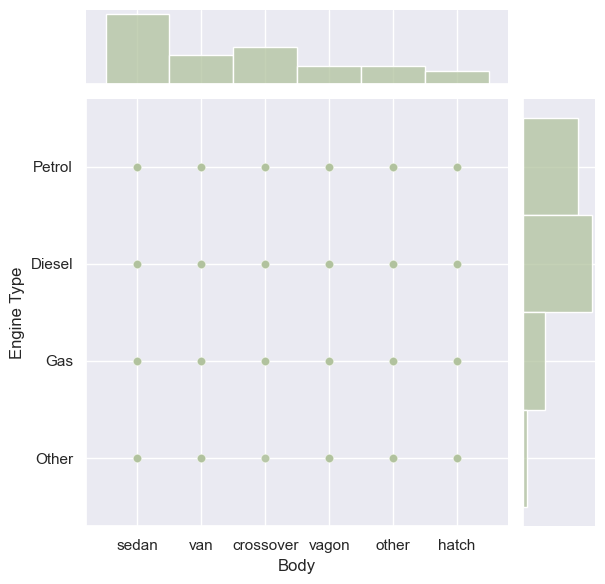

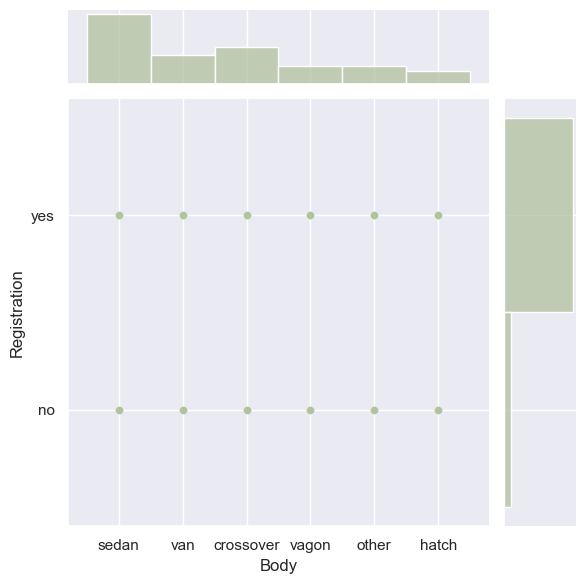

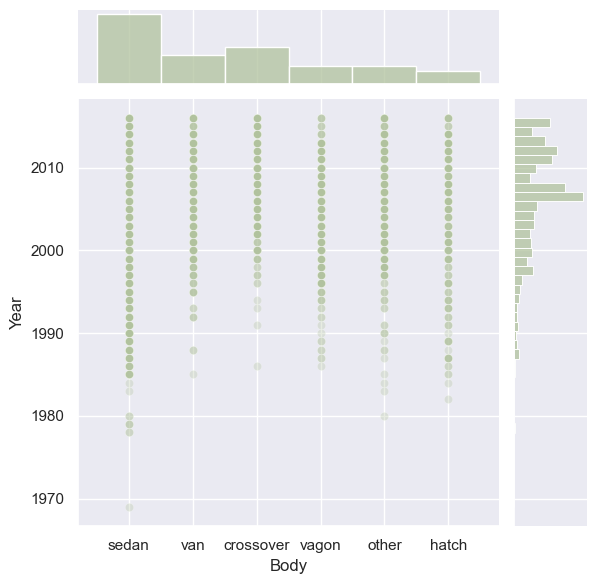

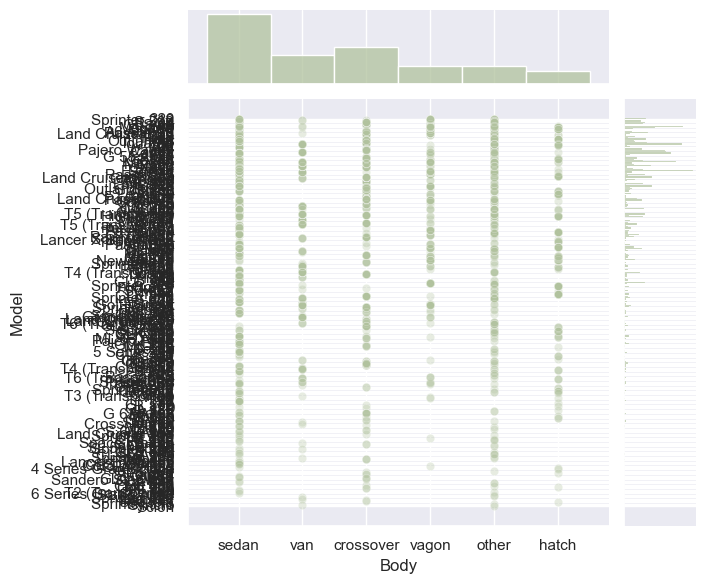

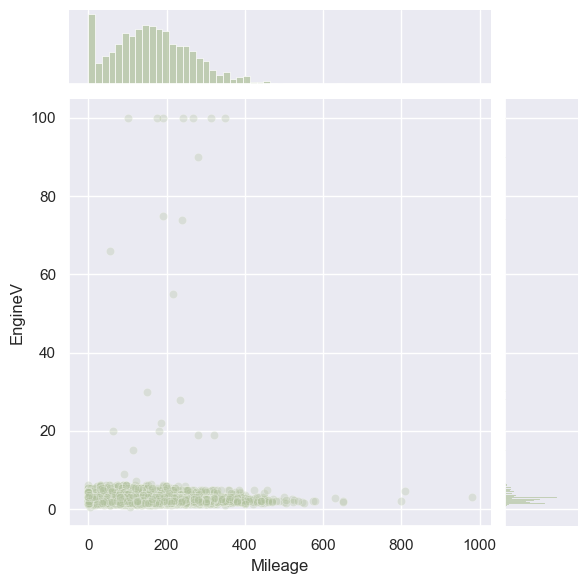

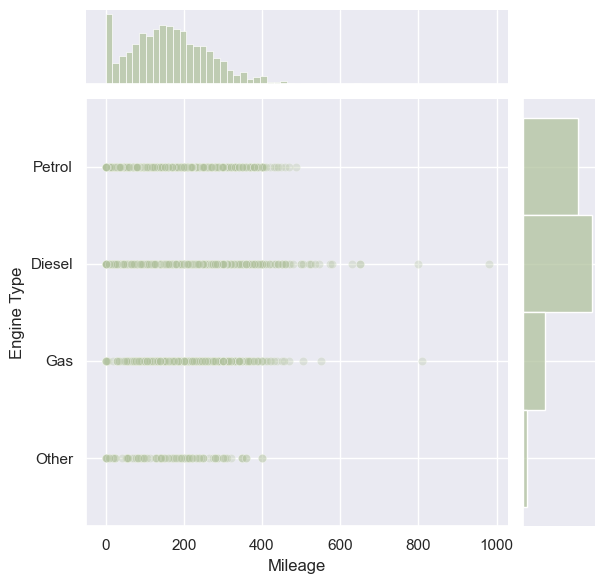

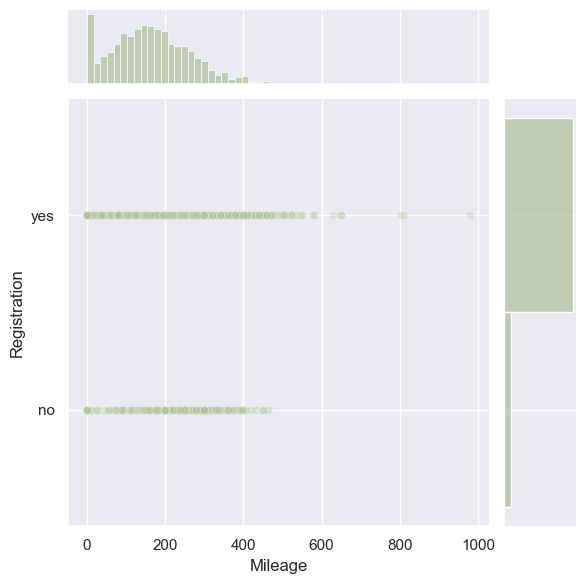

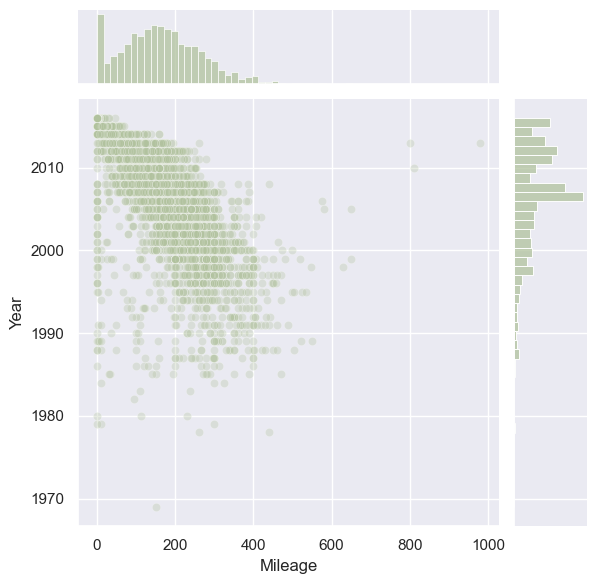

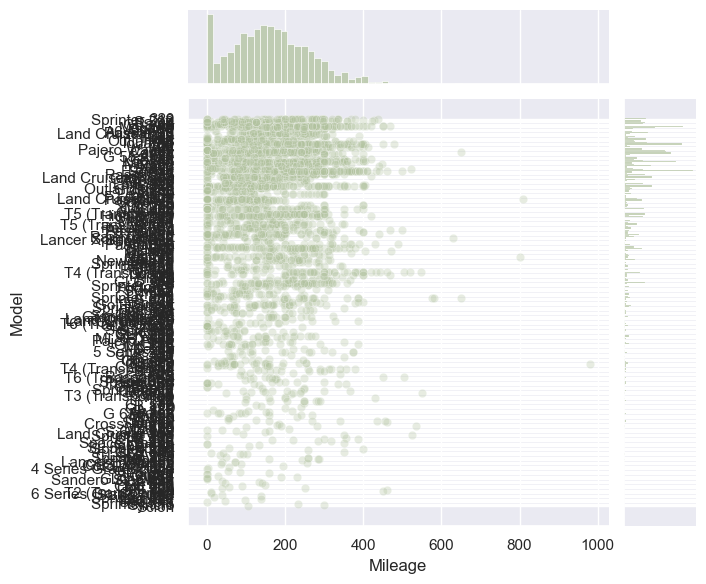

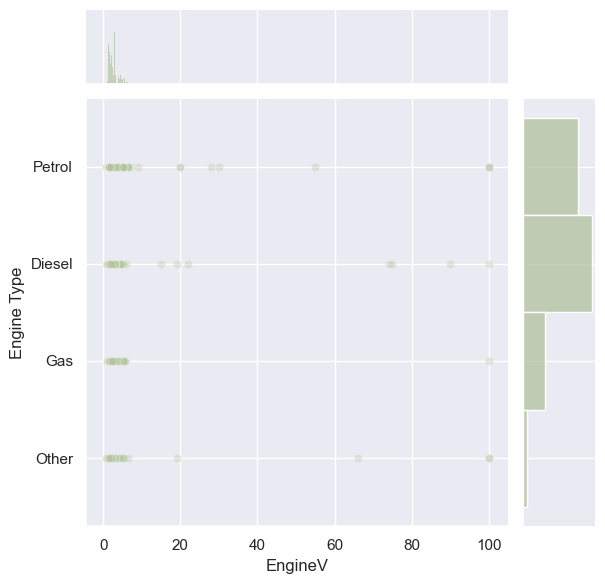

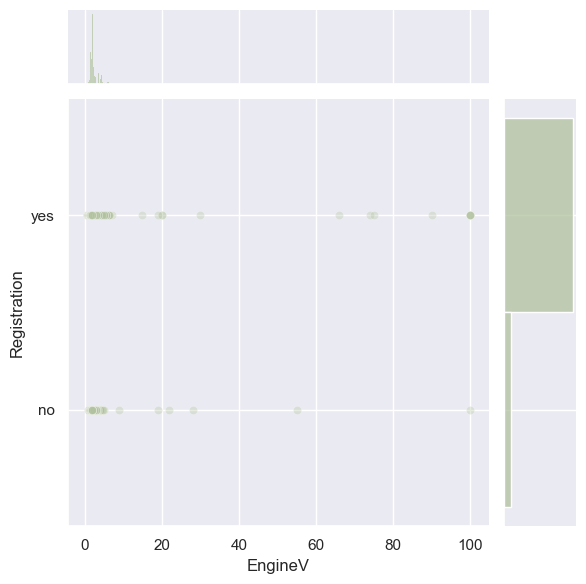

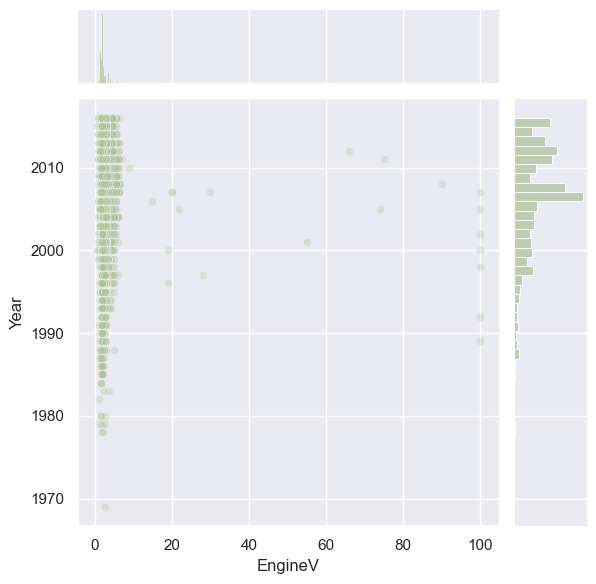

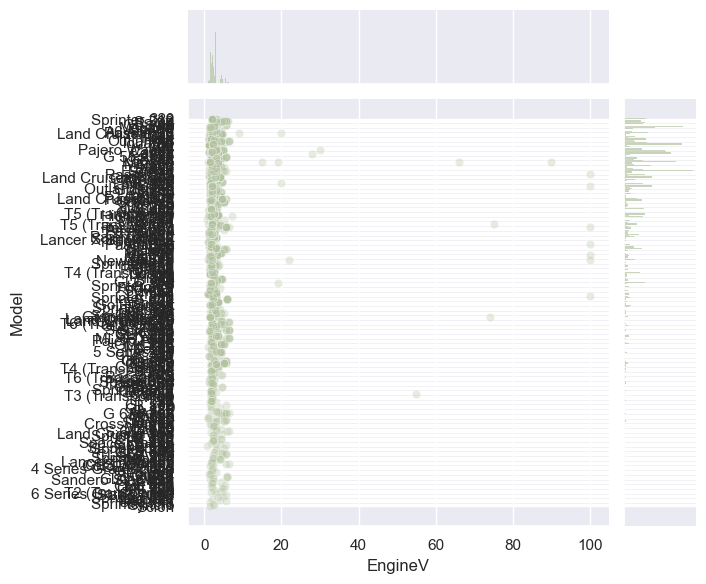

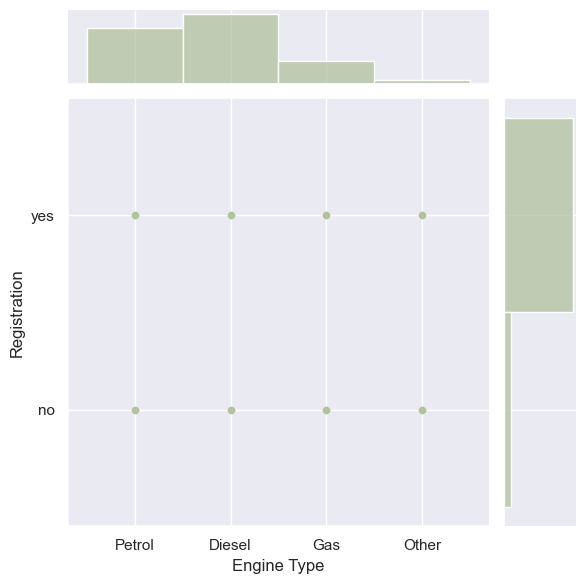

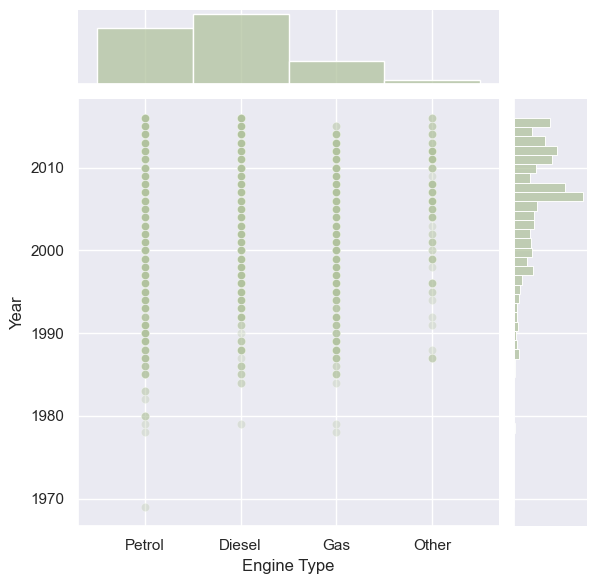

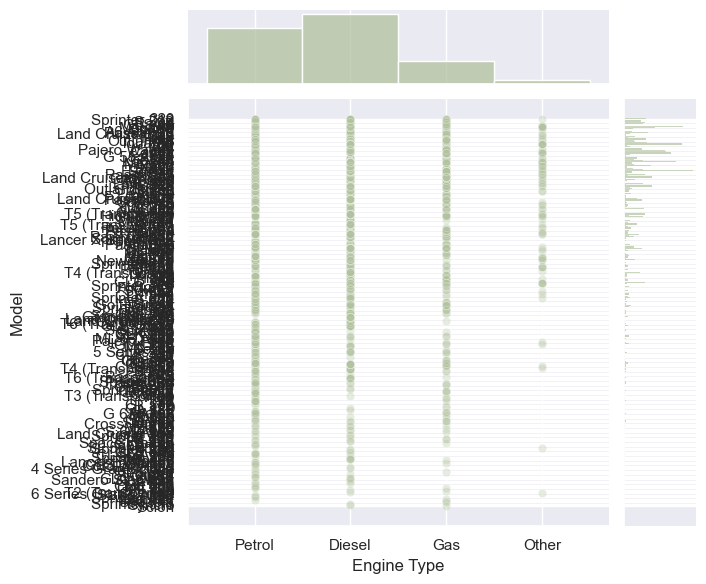

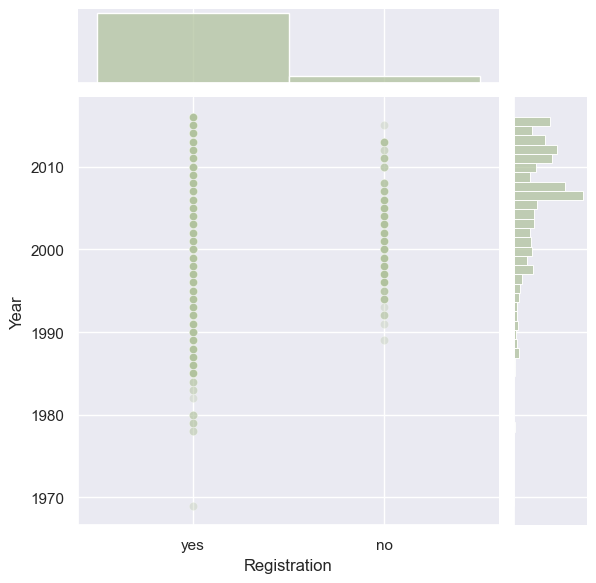

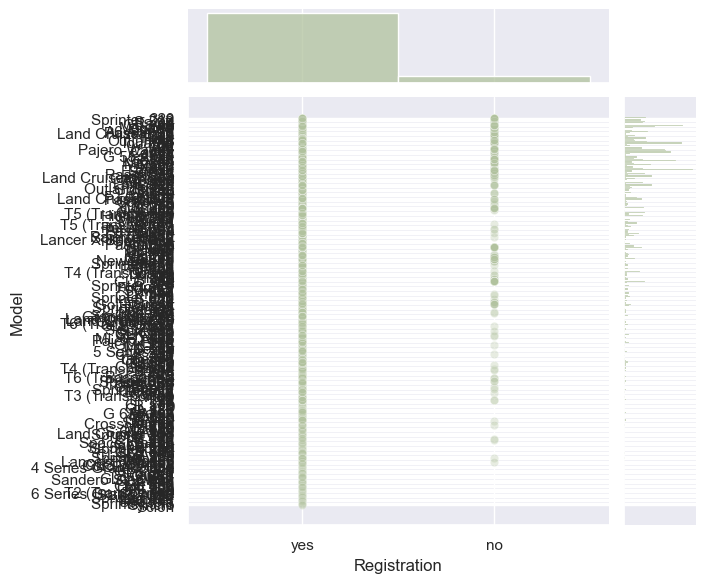

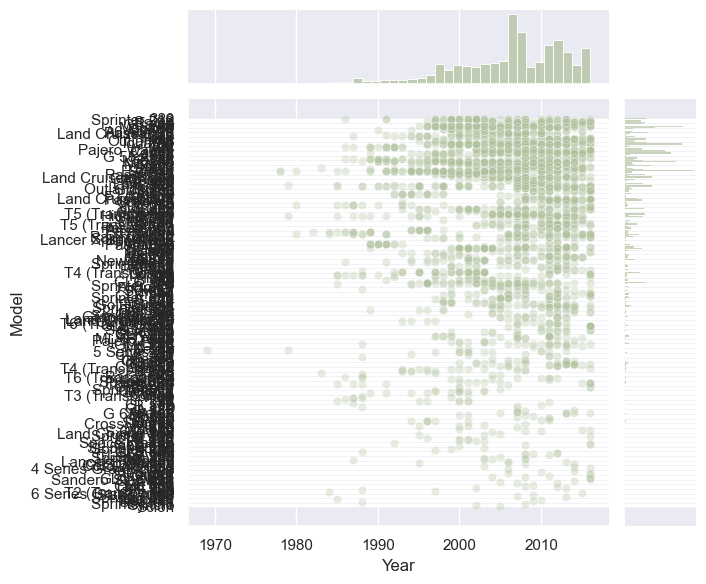

In [42]:
for item in list(itertools.combinations(col_names,2)):
    first_name = (item[0])
    second_name = (item[1])
    #print(clean_data[first_name])
        
    with sns.axes_style('darkgrid'):
        sns.jointplot(x=clean_data[first_name],
                      y=clean_data[second_name],
                      kind='scatter',
                      color ="#B1C29E",
                     joint_kws={'alpha':0.3})
    plt.show()

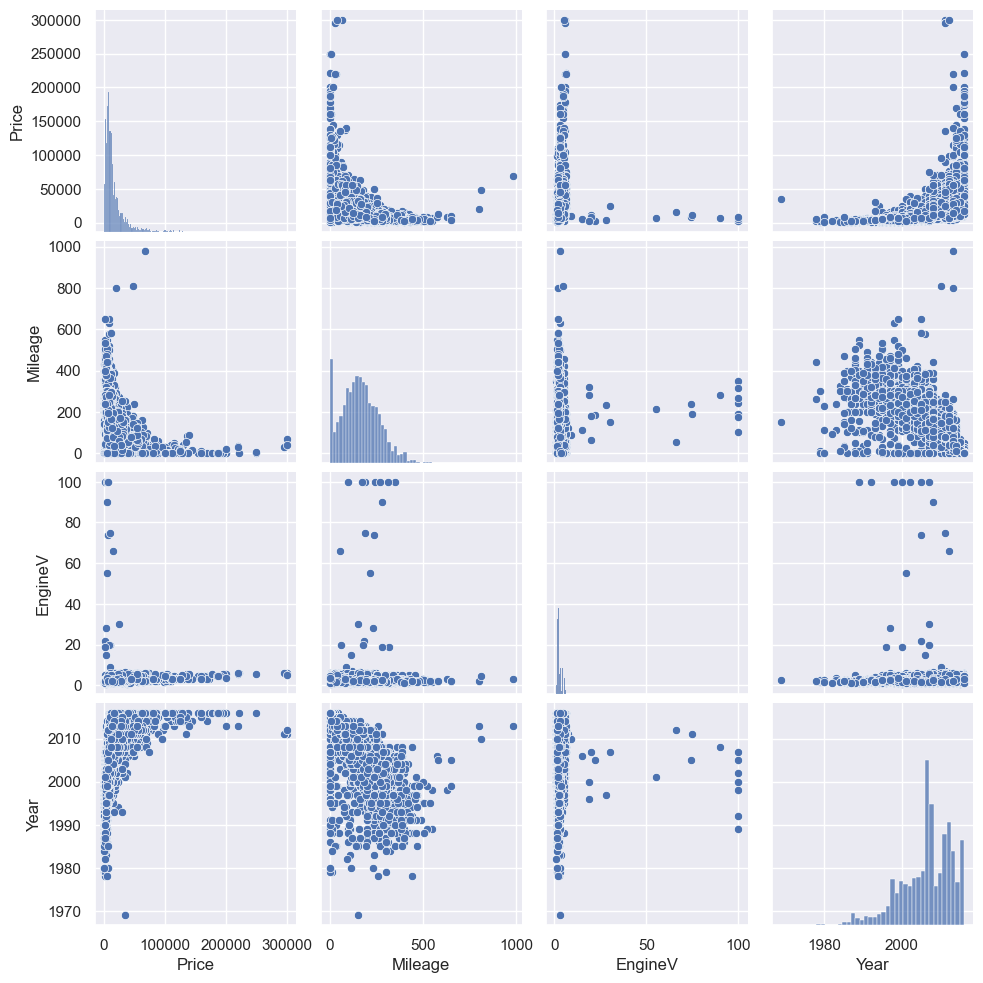

In [43]:
sns.pairplot(clean_data)

In [83]:
q = clean_data['Mileage'].quantile(0.99)
clean_data = clean_data[clean_data['Mileage'] <q]

In [84]:
q = clean_data['EngineV'].quantile(0.99)
clean_data = clean_data[clean_data['EngineV'] <q]

In [85]:
q = clean_data['Price'].quantile(0.99)

In [86]:
clean_data = clean_data[clean_data['Price'] <q]

In [87]:
clean_data.describe(include ="all")

Brand          Price   Body      Mileage      EngineV Engine Type Registration         Year    Model
count         3854    3854.000000   3854  3854.000000  3854.000000        3854         3854  3854.000000     3854
unique           7            NaN      6          NaN          NaN           4            2          NaN      296
top     Volkswagen            NaN  sedan          NaN          NaN      Diesel          yes          NaN  E-Class
freq           853            NaN   1469          NaN          NaN        1786         3492          NaN      178
mean           NaN   17386.392309    NaN   162.861183     2.424097         NaN          NaN  2006.300727      NaN
std            NaN   18128.873016    NaN    95.736636     0.914454         NaN          NaN     6.592323      NaN
min            NaN     600.000000    NaN     0.000000     0.600000         NaN          NaN  1969.000000      NaN
25%            NaN    6999.000000    NaN    95.000000     1.800000         NaN          NaN  2003.000000      NaN
50%            NaN   11300.000000    NaN   160.000000     2.200000         NaN          NaN  2007.000000      NaN
75%            NaN   20900.000000    NaN   230.000000     3.000000         NaN          NaN  2011.000000      NaN
max            NaN  124999.000000    NaN   435.000000     6.000000         NaN          NaN  2016.000000      NaN

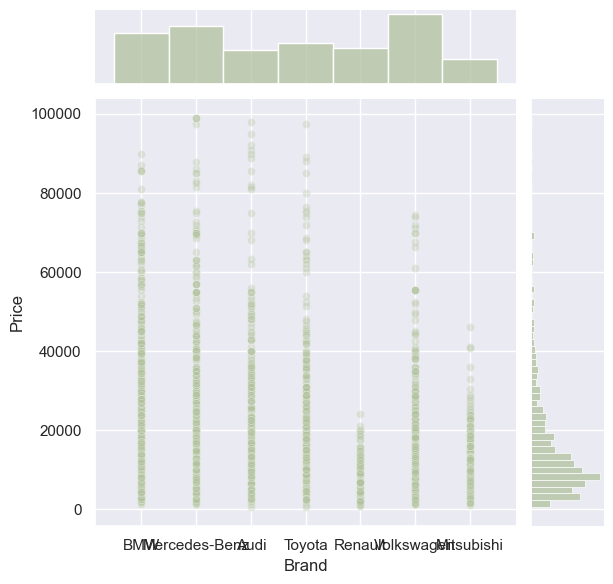

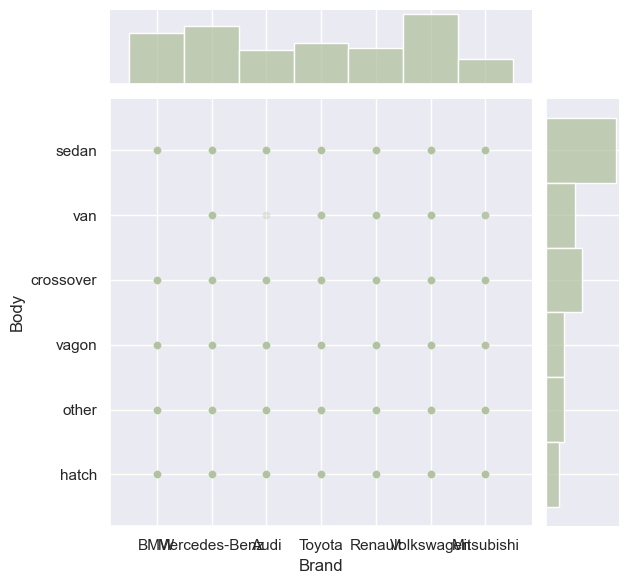

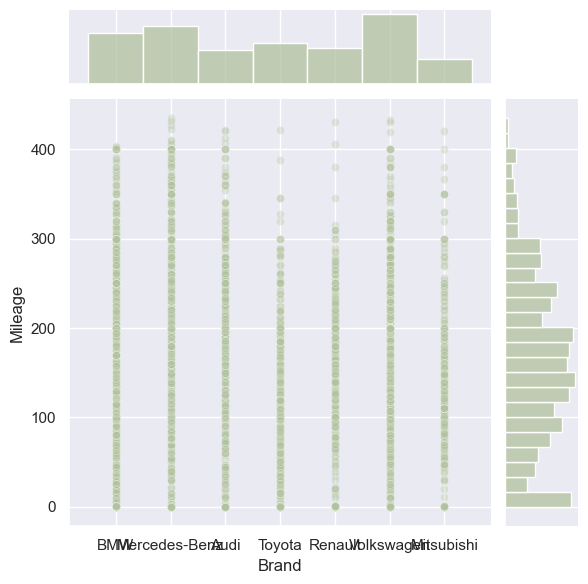

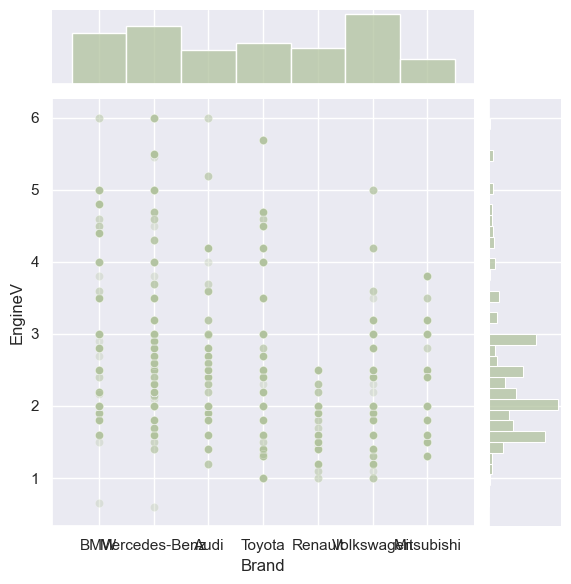

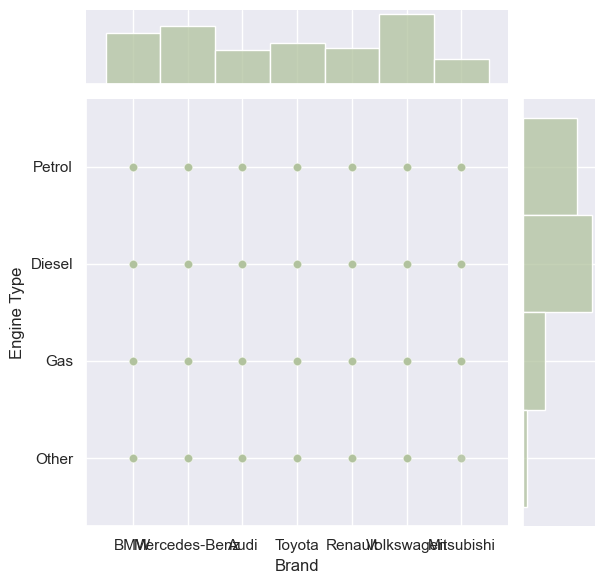

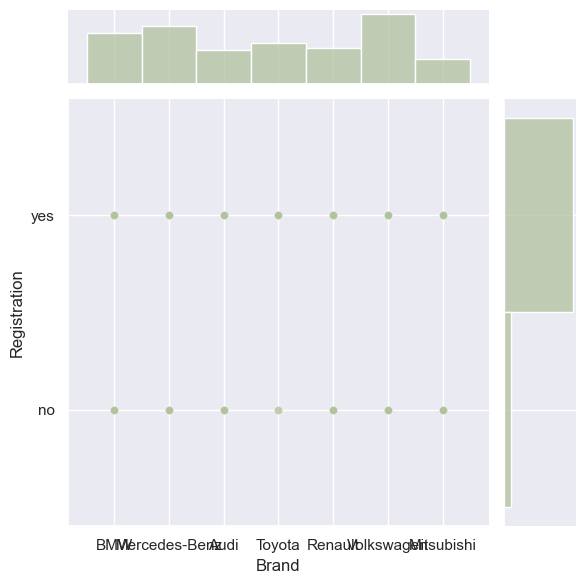

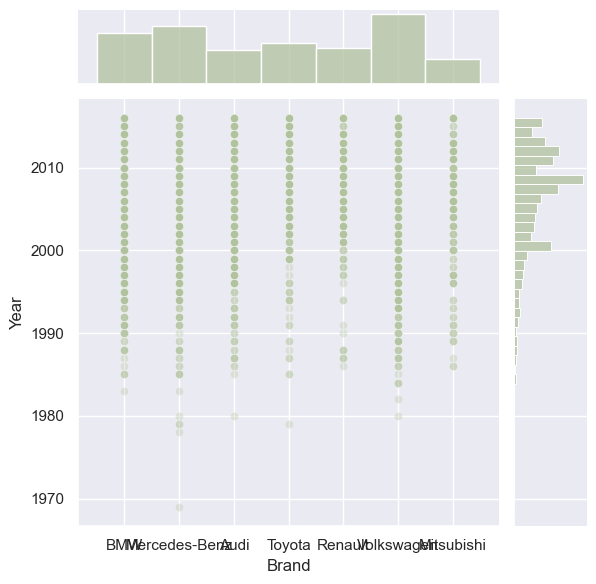

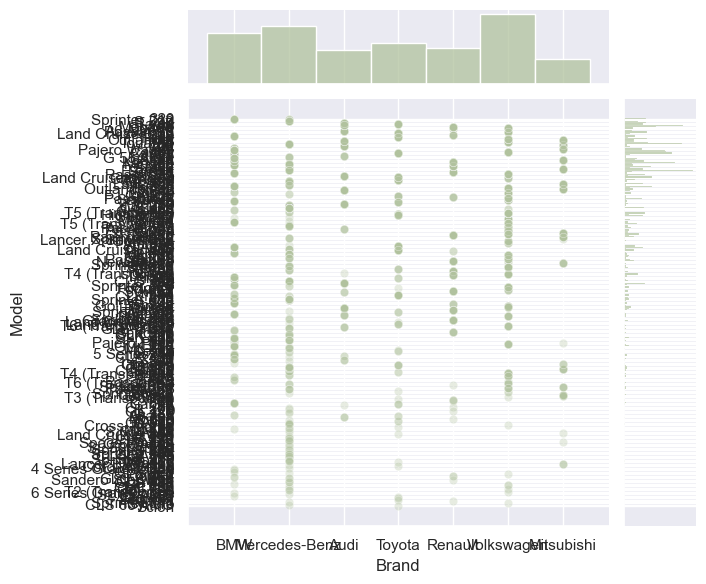

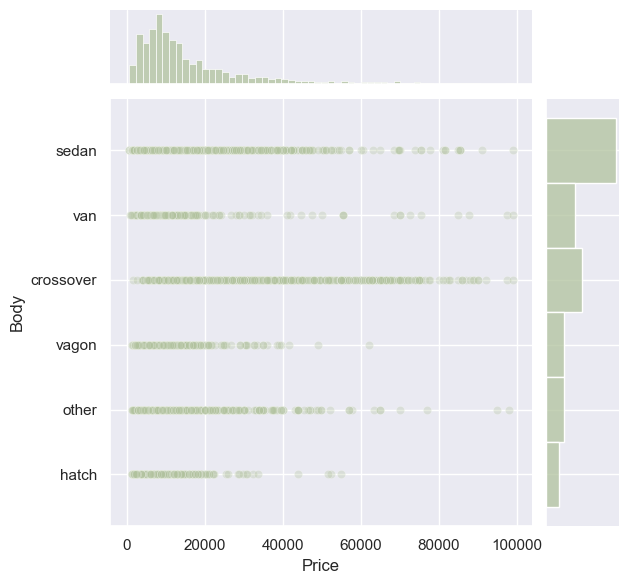

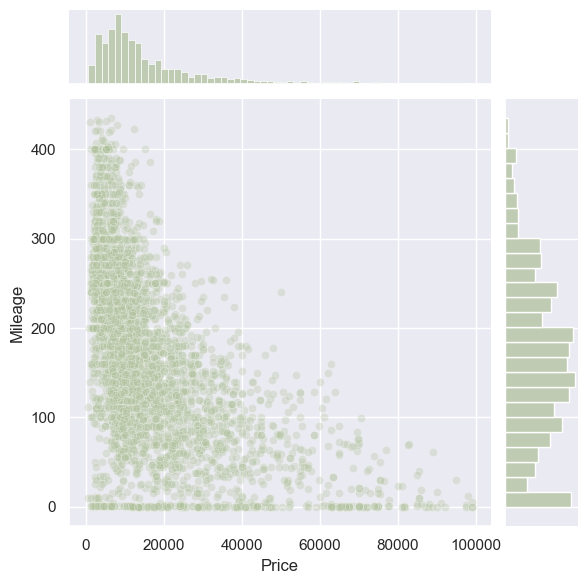

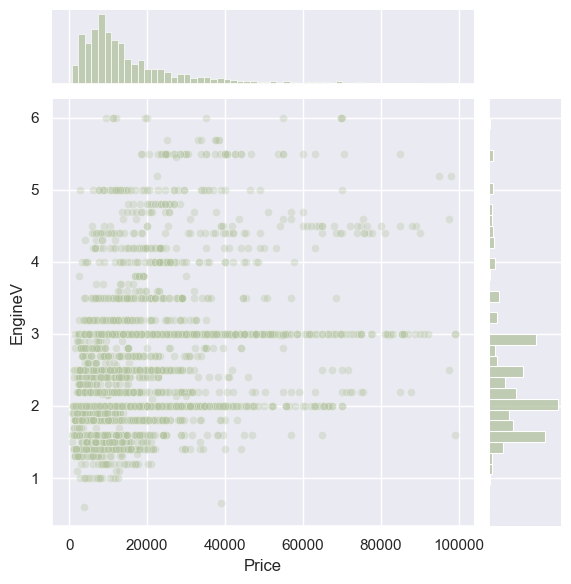

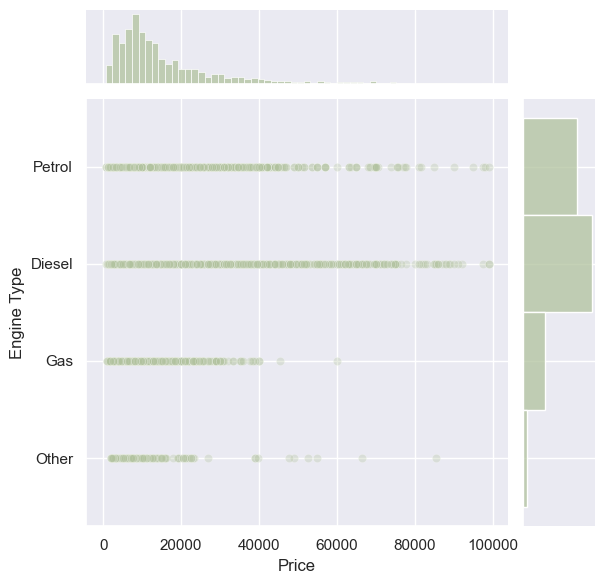

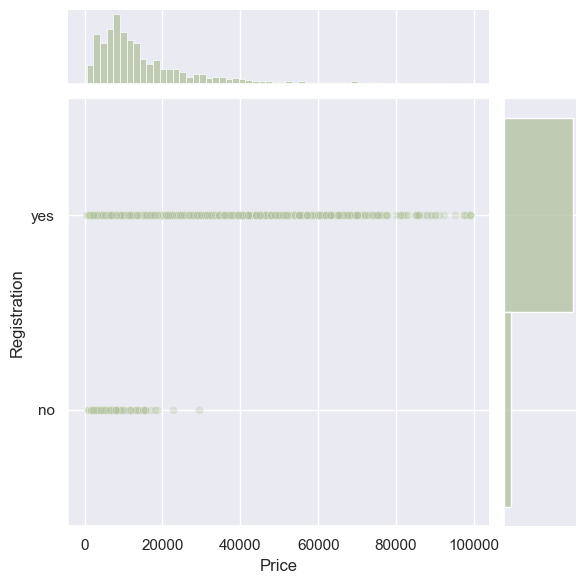

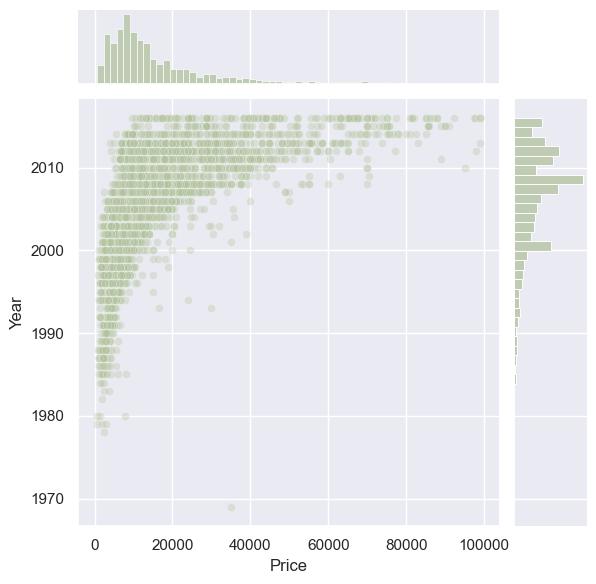

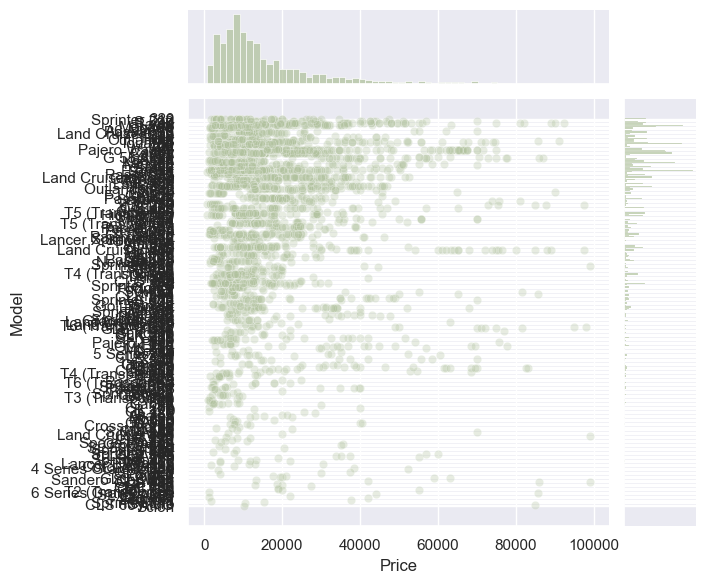

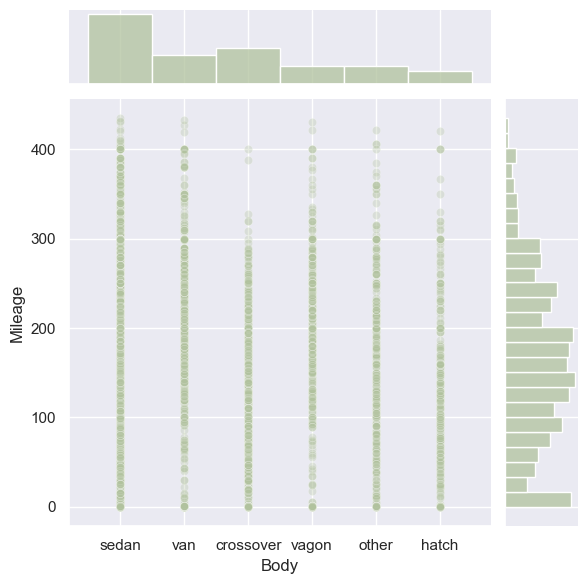

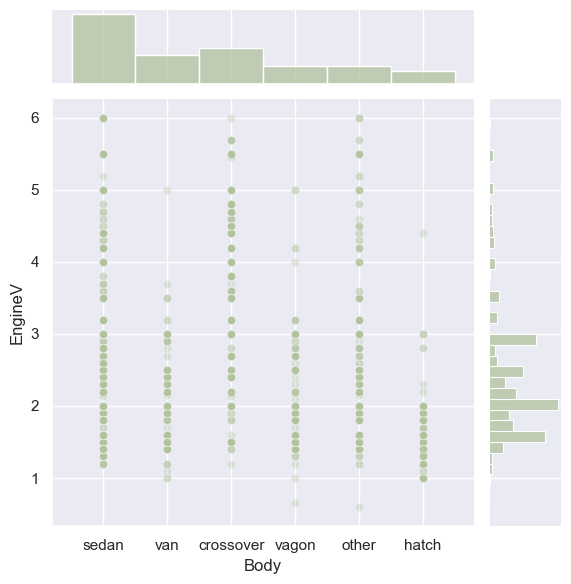

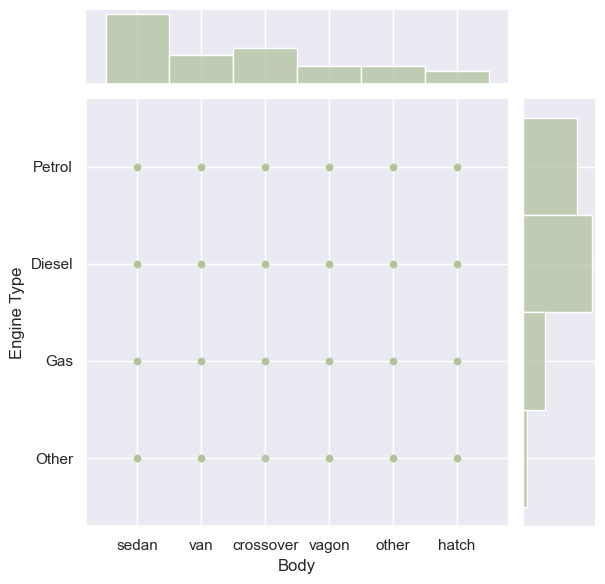

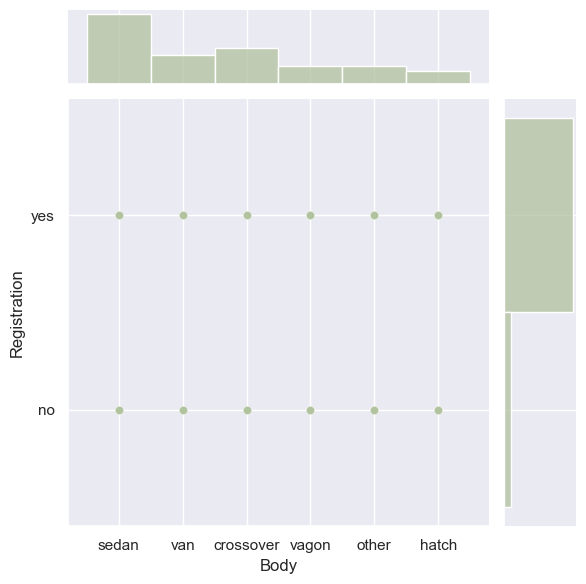

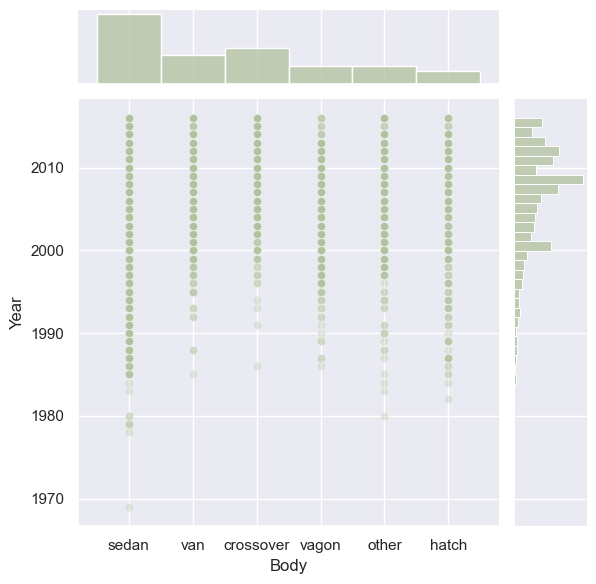

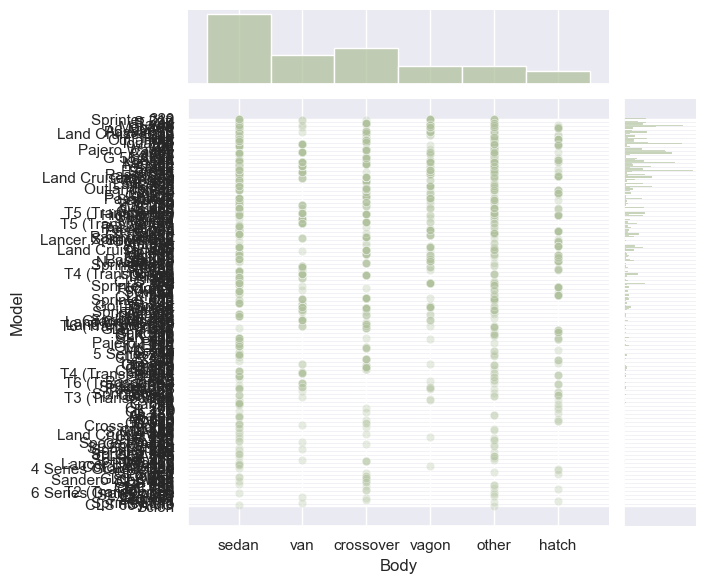

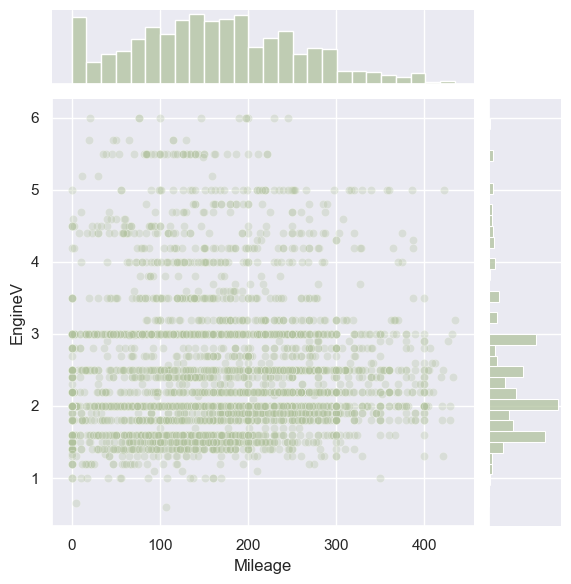

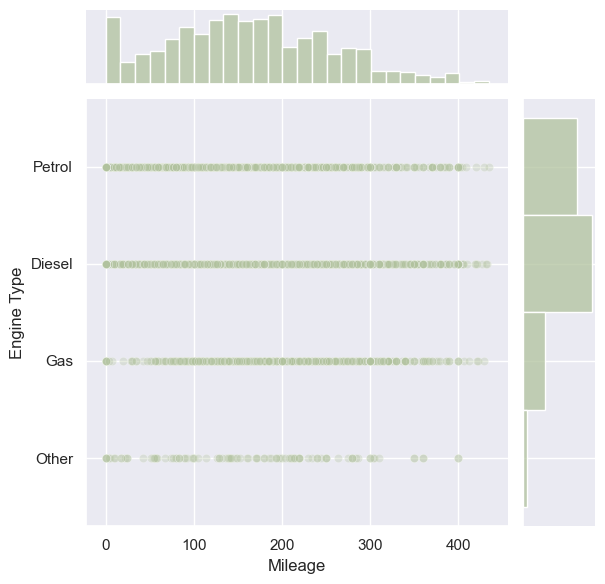

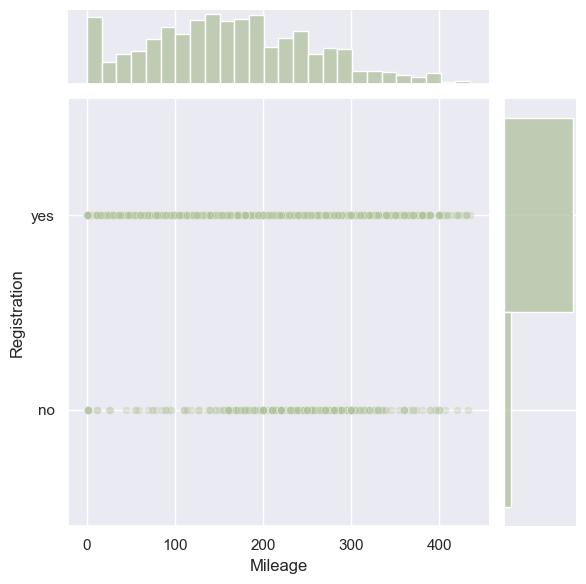

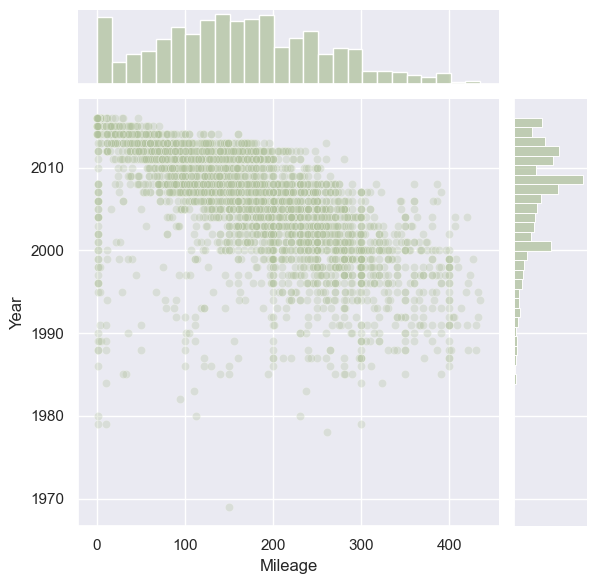

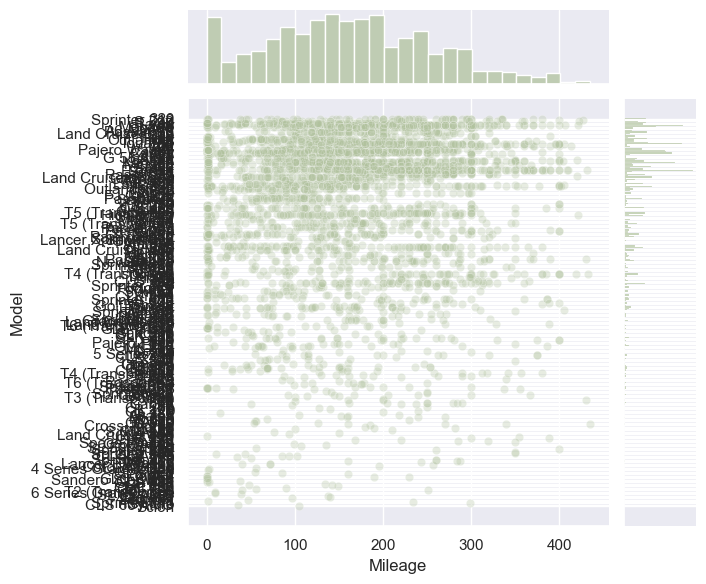

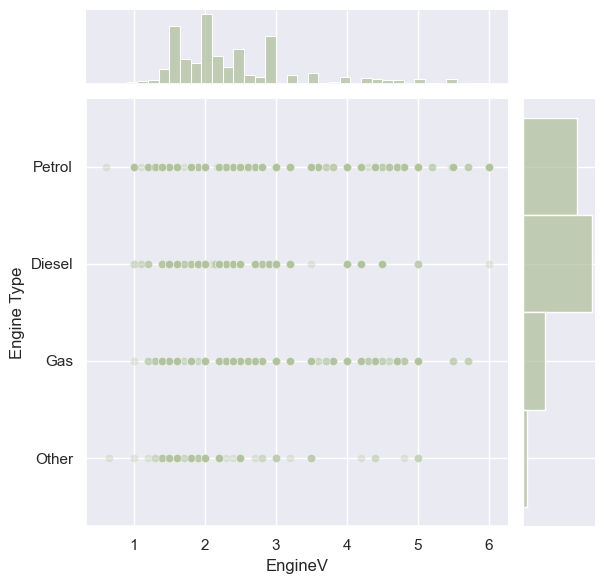

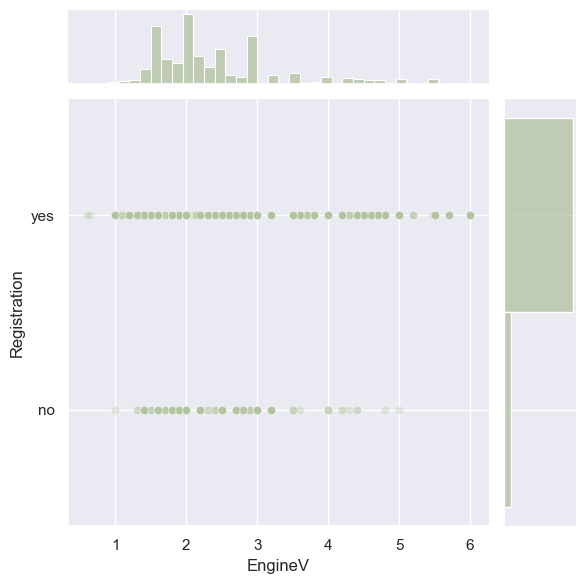

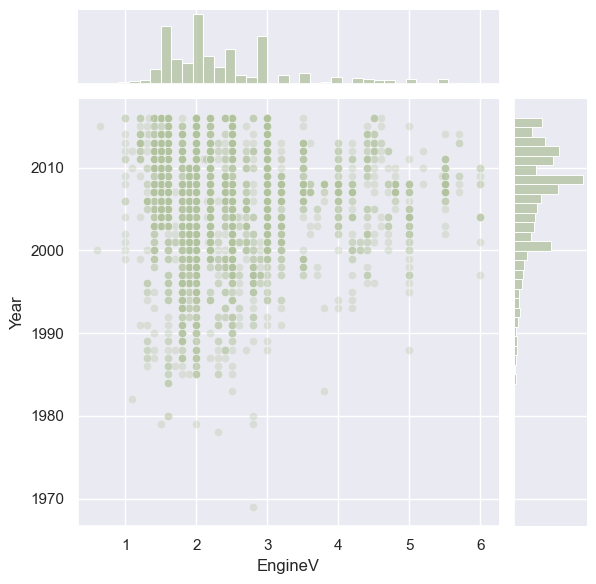

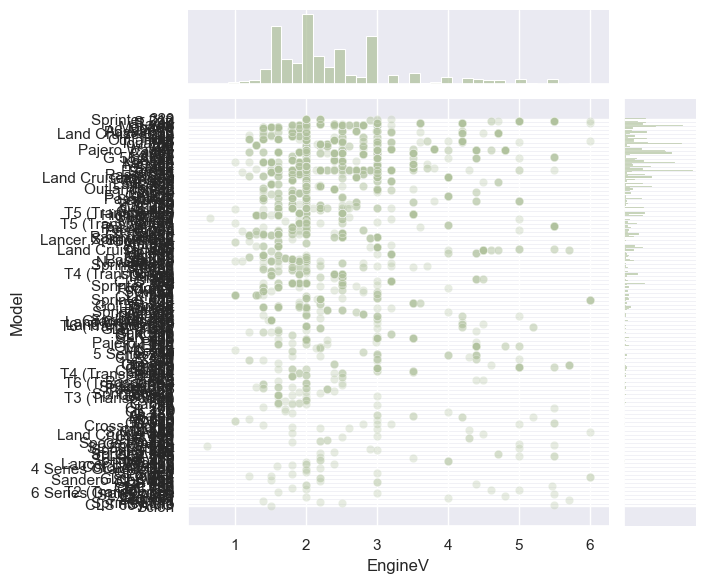

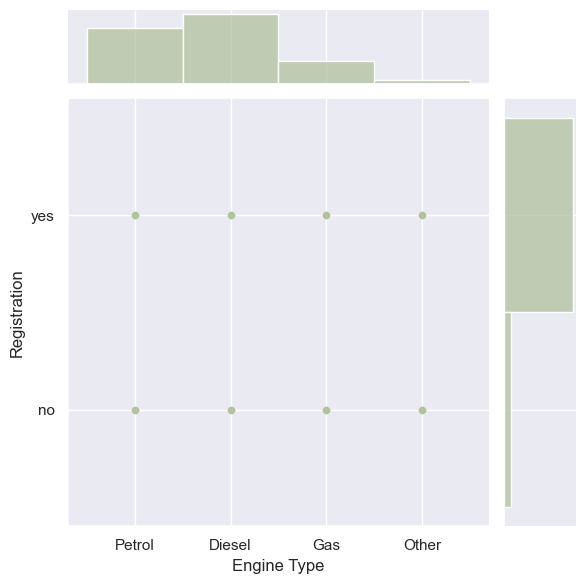

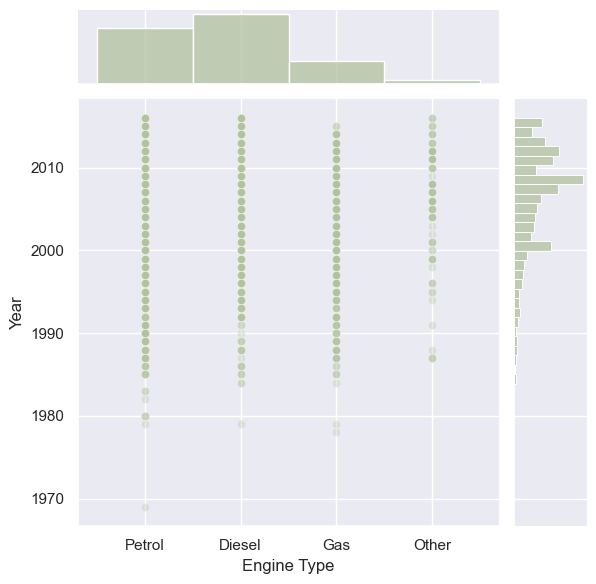

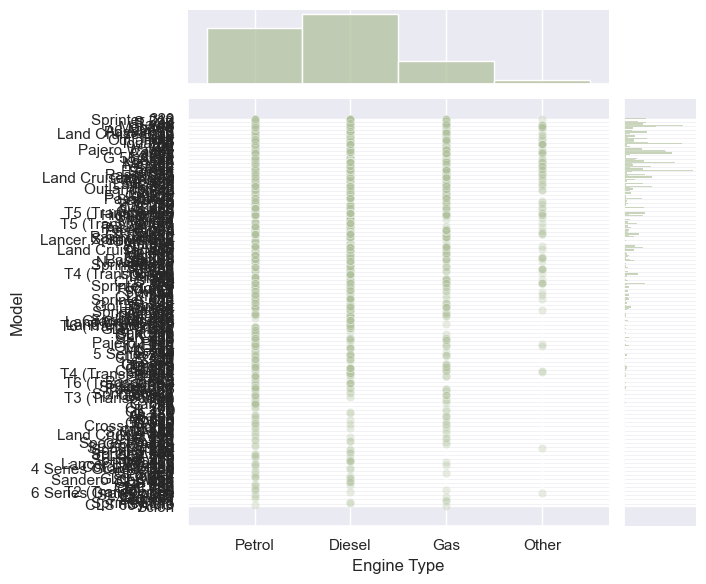

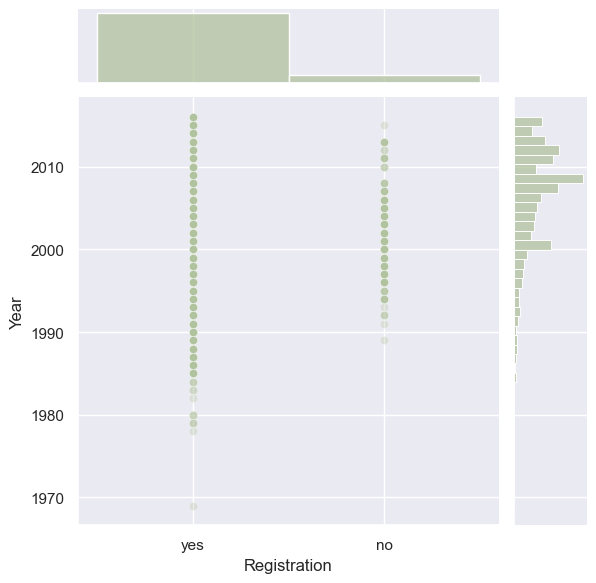

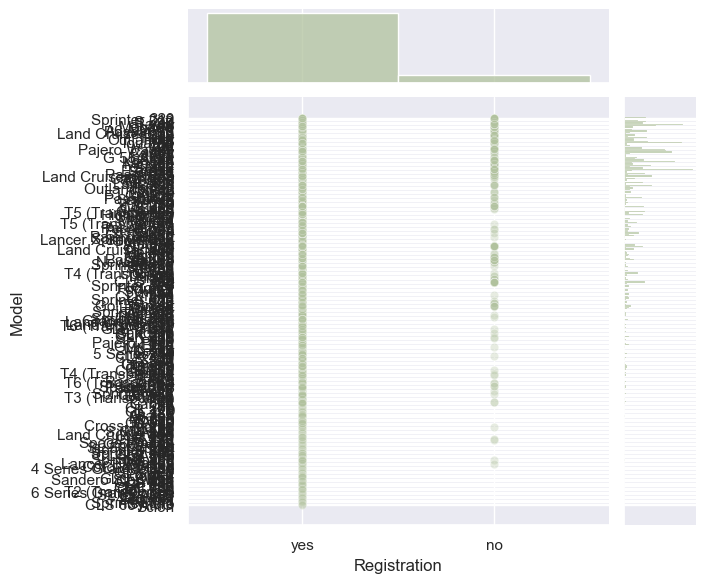

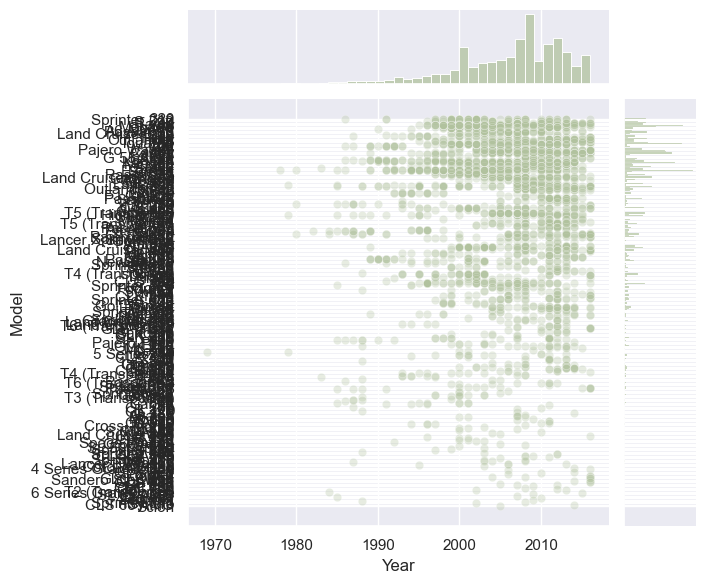

In [66]:
for item in list(itertools.combinations(col_names,2)):
    first_name = (item[0])
    second_name = (item[1])
    #print(clean_data[first_name])
        
    with sns.axes_style('darkgrid'):
        sns.jointplot(x=clean_data[first_name],
                      y=clean_data[second_name],
                      kind='scatter',
                      color ="#B1C29E",
                     joint_kws={'alpha':0.3})
    plt.show()

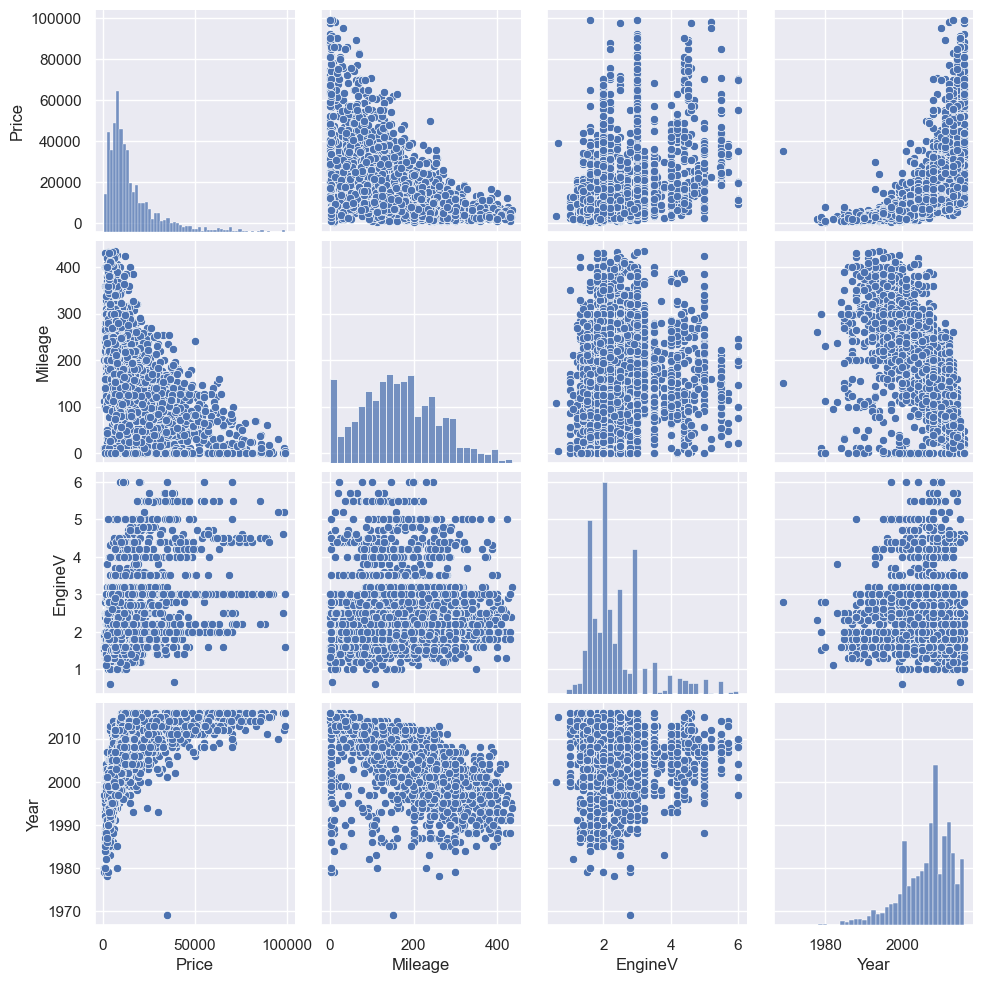

In [67]:
sns.pairplot(clean_data)

In [88]:
clean_data["log_price"]=np.log(clean_data["Price"])

In [89]:
clean_data

Brand    Price       Body  Mileage  EngineV Engine Type Registration  Year              Model  log_price
0               BMW   4200.0      sedan      277      2.0      Petrol          yes  1991                320   8.342840
1     Mercedes-Benz   7900.0        van      427      2.9      Diesel          yes  1999       Sprinter 212   8.974618
2     Mercedes-Benz  13300.0      sedan      358      5.0         Gas          yes  2003              S 500   9.495519
3              Audi  23000.0  crossover      240      4.2      Petrol          yes  2007                 Q7  10.043249
4            Toyota  18300.0  crossover      120      2.0      Petrol          yes  2011              Rav 4   9.814656
...             ...      ...        ...      ...      ...         ...          ...   ...                ...        ...
4338     Volkswagen  11500.0        van      163      2.5      Diesel          yes  2008   T5 (Transporter)   9.350102
4339         Toyota  17900.0      sedan       35      1.6      Petrol          yes  2014            Corolla   9.792556
4341            BMW   6500.0      sedan        1      3.5      Petrol          yes  1999                535   8.779557
4342            BMW   8000.0      sedan      194      2.0      Petrol          yes  1985                520   8.987197
4344     Volkswagen  13500.0        van      124      2.0      Diesel          yes  2013  T5 (Transporter)    9.510445

[3854 rows x 10 columns]

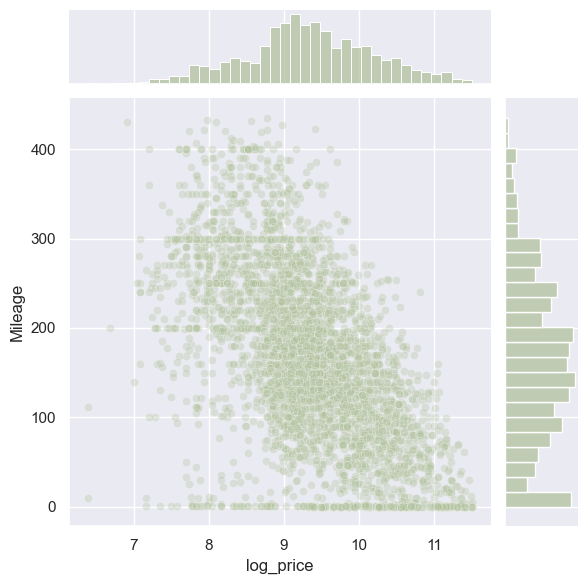

In [71]:
with sns.axes_style('darkgrid'):
    sns.jointplot(x=clean_data["log_price"],
                  y=clean_data["Mileage"],
                  kind='scatter',
                  color ="#B1C29E",
                 joint_kws={'alpha':0.3})

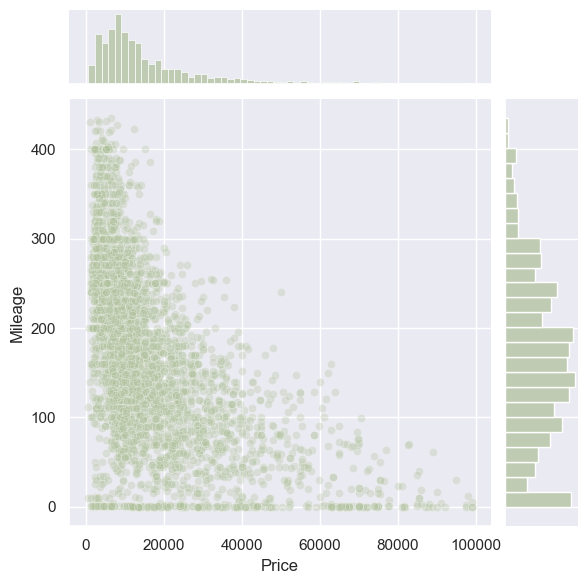

In [72]:
with sns.axes_style('darkgrid'):
    sns.jointplot(x=clean_data["Price"],
                  y=clean_data["Mileage"],
                  kind='scatter',
                  color ="#B1C29E",
                 joint_kws={'alpha':0.3})

In [90]:
clean_data = clean_data.drop(['Price', 'Model'], axis = 1)

In [91]:
clean_data

Brand       Body  Mileage  EngineV Engine Type Registration  Year  log_price
0               BMW      sedan      277      2.0      Petrol          yes  1991   8.342840
1     Mercedes-Benz        van      427      2.9      Diesel          yes  1999   8.974618
2     Mercedes-Benz      sedan      358      5.0         Gas          yes  2003   9.495519
3              Audi  crossover      240      4.2      Petrol          yes  2007  10.043249
4            Toyota  crossover      120      2.0      Petrol          yes  2011   9.814656
...             ...        ...      ...      ...         ...          ...   ...        ...
4338     Volkswagen        van      163      2.5      Diesel          yes  2008   9.350102
4339         Toyota      sedan       35      1.6      Petrol          yes  2014   9.792556
4341            BMW      sedan        1      3.5      Petrol          yes  1999   8.779557
4342            BMW      sedan      194      2.0      Petrol          yes  1985   8.987197
4344     Volkswagen        van      124      2.0      Diesel          yes  2013   9.510445

[3854 rows x 8 columns]

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [95]:
vif

VIF features
0   3.868589  Mileage
1  10.653514     Year
2   8.033433  EngineV

In [96]:
clean_data = clean_data.drop('Year', axis = 1)

In [97]:
clean_data

Brand       Body  Mileage  EngineV Engine Type Registration  log_price
0               BMW      sedan      277      2.0      Petrol          yes   8.342840
1     Mercedes-Benz        van      427      2.9      Diesel          yes   8.974618
2     Mercedes-Benz      sedan      358      5.0         Gas          yes   9.495519
3              Audi  crossover      240      4.2      Petrol          yes  10.043249
4            Toyota  crossover      120      2.0      Petrol          yes   9.814656
...             ...        ...      ...      ...         ...          ...        ...
4338     Volkswagen        van      163      2.5      Diesel          yes   9.350102
4339         Toyota      sedan       35      1.6      Petrol          yes   9.792556
4341            BMW      sedan        1      3.5      Petrol          yes   8.779557
4342            BMW      sedan      194      2.0      Petrol          yes   8.987197
4344     Volkswagen        van      124      2.0      Diesel          yes   9.510445

[3854 rows x 7 columns]

In [98]:
data_with_dummies = pd.get_dummies(clean_data, drop_first = True)

In [100]:
data_with_dummies.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [103]:
data_with_dummies = data_with_dummies[[ 'log_price','Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']]

In [104]:
data_with_dummies

log_price  Mileage  EngineV  Brand_BMW  ...  Engine Type_Gas  Engine Type_Other  Engine Type_Petrol  Registration_yes
0      8.342840      277      2.0       True  ...            False              False                True              True
1      8.974618      427      2.9      False  ...            False              False               False              True
2      9.495519      358      5.0      False  ...             True              False               False              True
3     10.043249      240      4.2      False  ...            False              False                True              True
4      9.814656      120      2.0      False  ...            False              False                True              True
...         ...      ...      ...        ...  ...              ...                ...                 ...               ...
4338   9.350102      163      2.5      False  ...            False              False               False              True
4339   9.792556       35      1.6      False  ...            False              False                True              True
4341   8.779557        1      3.5       True  ...            False              False                True              True
4342   8.987197      194      2.0       True  ...            False              False                True              True
4344   9.510445      124      2.0      False  ...            False              False               False              True

[3854 rows x 18 columns]